<center><h1>Cab Investment Insights for XYZ Firm</h1></center>

<left><h2>Brief Background</h2></left>

<left><h3>The Client</h3></left>

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<left><h3>The Dataset</h3></left>

The dataset is made up of multiple datasets that contain information on 2 cab companies. Time period of data is from 31/01/2016 to 31/12/2018. The datasets include:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

<left><h2>Exploratory Data Analysis</h2></left>

<left><h3>Load the Dataset</h3></left>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Define file paths to the datasets
cab_data = '/Users/dave/Downloads/Cab_Data.csv'
city_data = '/users/dave/Downloads/City.csv'
customer_data = '/users/dave/Downloads/Customer_ID.csv'
transaction_data = '/users/dave/Downloads/Transaction_ID.csv'

In [3]:
#load each csv data into a dataframe
df_cab = pd.read_csv(cab_data)
df_city = pd.read_csv(city_data)
df_customer = pd.read_csv(customer_data)
df_transaction = pd.read_csv(transaction_data)

<left><h3>Cab_Data Analysis</h3></left>

In [4]:
# View the first few rows of the dataset
print(df_cab.head())


   Transaction ID  Date of Travel   Company        City  KM Travelled   
0        10000011           42377  Pink Cab  ATLANTA GA         30.45  \
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [5]:
# Print the last few rows
print(df_cab.tail())

        Transaction ID  Date of Travel     Company           City   
359387        10440101           43108  Yellow Cab  WASHINGTON DC  \
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  


In [6]:
# Display basic statistics about the data
print(df_cab.describe())

       Transaction ID  Date of Travel   KM Travelled  Price Charged   
count    3.593920e+05   359392.000000  359392.000000  359392.000000  \
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  


In [7]:
#number of rows in the df_cab dataset
no_of_rows = df_cab.shape[0]
print(f"Number of entries in the df_cab datasset is {no_of_rows}")

Number of entries in the df_cab datasset is 359392


In [8]:
#check for missing data
missing_data_cab = df_cab.isna().sum()
print(missing_data_cab)

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [9]:
#check for duplicate rows
duplicate_rows = df_cab.duplicated(keep=False)

if duplicate_rows.any():
    print("There are duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


<left><h4>Univariate Analysis of Categorical Features</h4></left>

Company 

In [10]:
#check for missing values

missing_company_values = df_cab['Company'].isnull().sum()

print(f"Number of missing values in 'Company' feature: {missing_company_values}")


Number of missing values in 'Company' feature: 0


In [11]:
unique_companies = df_cab['Company'].unique()
print(unique_companies)

['Pink Cab' 'Yellow Cab']


In [12]:
# Print the distinct companies and their counts
company_counts = df_cab['Company'].value_counts()

print(company_counts)

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


In [13]:
# Calculate the percentage
company_percentage = (df_cab['Company'].value_counts() / len(df_cab)) * 100
print(company_percentage)

Company
Yellow Cab    76.429358
Pink Cab      23.570642
Name: count, dtype: float64


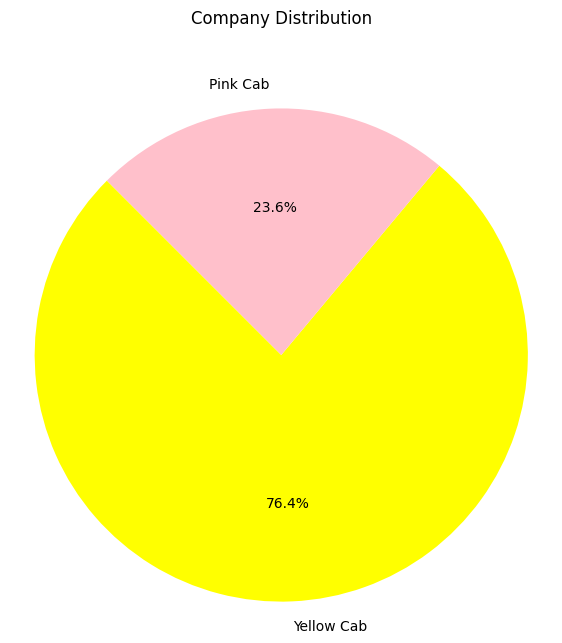

In [14]:
#create a pied chart of the 'Company' distribution
# Define colors using names
colors = ['yellow', 'pink']

# Create a pie chart with color names
plt.figure(figsize=(7, 7))
plt.pie(company_percentage, labels=company_percentage.index, autopct='%1.1f%%', startangle=135, colors=colors)
plt.title('Company Distribution', y=1.1)
plt.axis('equal')
plt.show()


City

In [15]:
#check for missing values
missing_values_city = df_cab['City'].isna().sum()
print(f"Number of missing values in 'City' feature: {missing_values_city}")

Number of missing values in 'City' feature: 0


In [16]:
unique_cities = df_cab['City'].unique()
print(unique_cities)

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


Insight: The unique values are indeed unique and none is repeated as a result of spelling or case

In [17]:
# to have an understanding of the distribution of the 'city' feature
# Print the distinct companies and their counts
city_counts = df_cab['City'].value_counts()

print(city_counts)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64


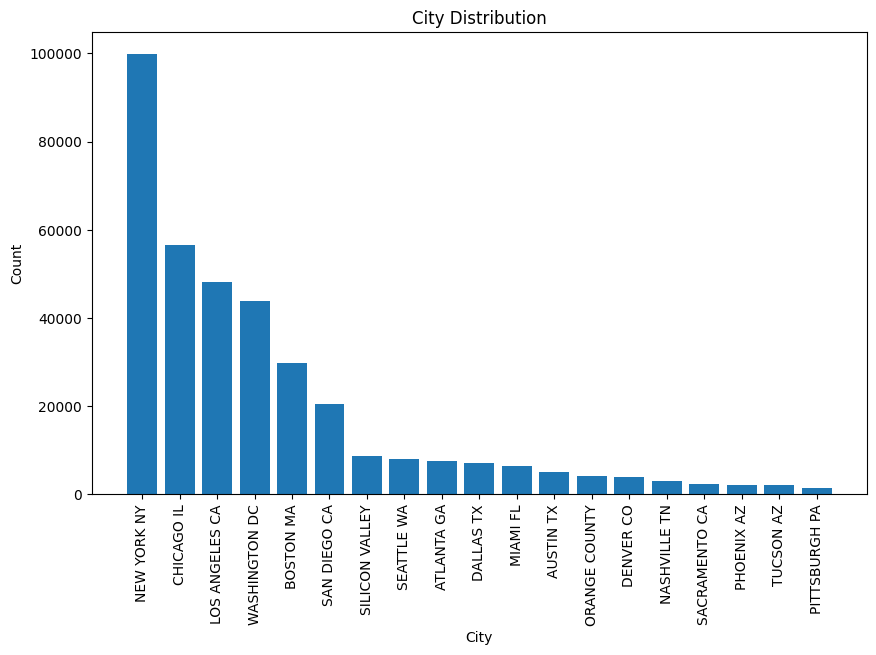

In [18]:
#create a bar plot of 'city' feature
# count of each city has been done as city_counts
# Extract city names and their counts
cities = city_counts.index
counts = city_counts.values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cities, counts)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()

Insight: Cities with the most trips include New York NY, Chicago IL, Los Angeles CA, Washington DC, Boston MA and San Diego CA


'Transaction ID' Feature

In [19]:
#check for uniqueness of this feature
#check if number of unique entries is equal to number of entries in the dataset - 359392
unique_entries_count_trans_id = df_cab['Transaction ID'].nunique()

print(f"Number of unique entries in 'Transaction ID': {unique_entries_count_trans_id}")
if unique_entries_count_trans_id == 359392:
    print('All entries are unique')
else:
    print('There are duplicate entries')

Number of unique entries in 'Transaction ID': 359392
All entries are unique


<h4 style='text-align: left'>Univariate Analysis of Numerical Features</h4>

'Price Charged' Feature

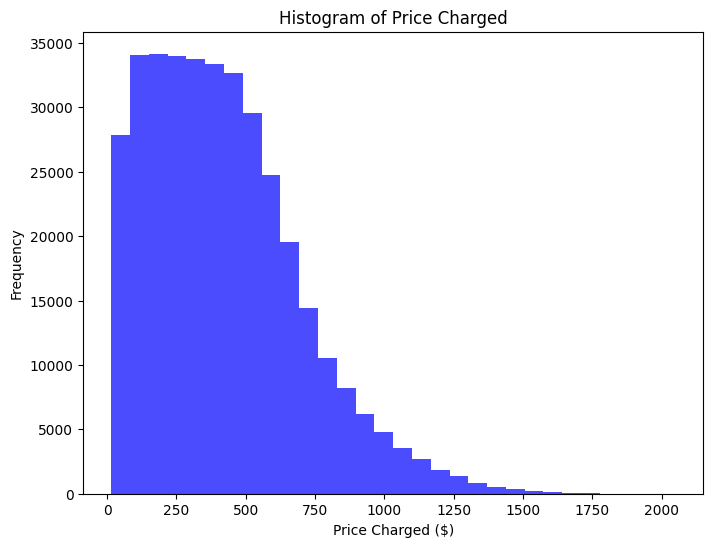

In [20]:
# Create a histogram for 'Price Charged' to check the distribution
plt.figure(figsize=(8, 6))
plt.hist(df_cab['Price Charged'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Price Charged')
plt.xlabel('Price Charged ($)')
plt.ylabel('Frequency')
plt.show()

Insight: The distribution is highly skewed to the right

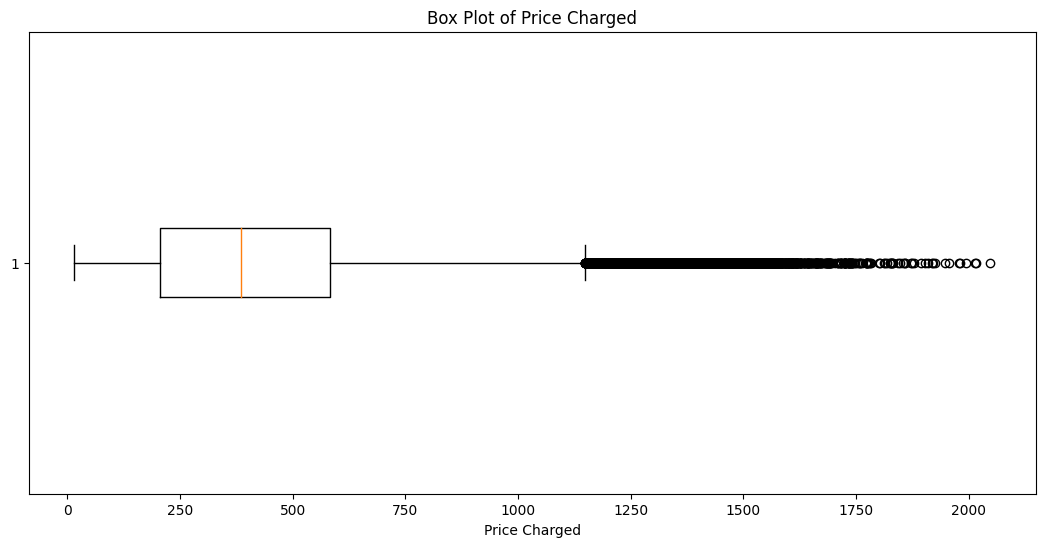

In [21]:
# Create a box plot for 'Price Charged'
# Use box plot to identify outliers

plt.figure(figsize=(13, 6))
plt.boxplot(df_cab['Price Charged'], vert=False)
plt.title('Box Plot of Price Charged')
plt.xlabel('Price Charged')
plt.show()


Insight: The number of outliers seem to be so many

In [22]:
#Use z-score to identify outliers

# Calculate Z-scores for 'Price Charged' and set a threshold for outliers
z_scores = stats.zscore(df_cab['Price Charged'])
threshold = 2  # Adjust this threshold as needed

# Identify outliers based on Z-scores
outliers = df_cab[abs(z_scores) > threshold]

# Print the outliers
print("Outliers based on Z-scores:")
print(outliers)


Outliers based on Z-scores:
        Transaction ID  Date of Travel     Company            City   
63            10000074           42371    Pink Cab  LOS ANGELES CA  \
73            10000084           42372    Pink Cab  LOS ANGELES CA   
77            10000088           42372    Pink Cab  LOS ANGELES CA   
106           10000117           42372    Pink Cab  LOS ANGELES CA   
233           10000384           42371  Yellow Cab      ATLANTA GA   
...                ...             ...         ...             ...   
358836        10439231           43105  Yellow Cab     NEW YORK NY   
358843        10439238           43102  Yellow Cab     NEW YORK NY   
358894        10439302           43105  Yellow Cab     NEW YORK NY   
358920        10439329           43105  Yellow Cab     NEW YORK NY   
358949        10439363           43105  Yellow Cab     NEW YORK NY   

        KM Travelled  Price Charged  Cost of Trip  
63             46.00         997.84      542.8000  
73             45.63       

Insight: This gives a high number of outliers - 15,692

Outlier Detection using IQR

In [23]:
# Calculate the IQR for 'Price Charged'
Q1 = df_cab['Price Charged'].quantile(0.25)
Q3 = df_cab['Price Charged'].quantile(0.75)
IQR = Q3 - Q1


In [24]:
# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [25]:
# Identify potential outliers based on IQR
outliers_iqr = df_cab[(df_cab['Price Charged'] < lower_bound) | (df_cab['Price Charged'] > upper_bound)]


In [26]:
outliers_iqr

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192
240,10000391,42378,Yellow Cab,ATLANTA GA,38.08,1239.72,539.2128
247,10000398,42371,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540
...,...,...,...,...,...,...,...
356234,10435777,43463,Yellow Cab,NEW YORK NY,43.70,1250.09,608.3040
356286,10435832,43462,Yellow Cab,NEW YORK NY,46.02,1278.24,579.8520
356292,10435838,43462,Yellow Cab,NEW YORK NY,41.80,1268.75,516.6480
356303,10435849,43462,Yellow Cab,NEW YORK NY,47.60,1215.36,616.8960


The number of outliers still appears so high

'Cost of Trip' Feature

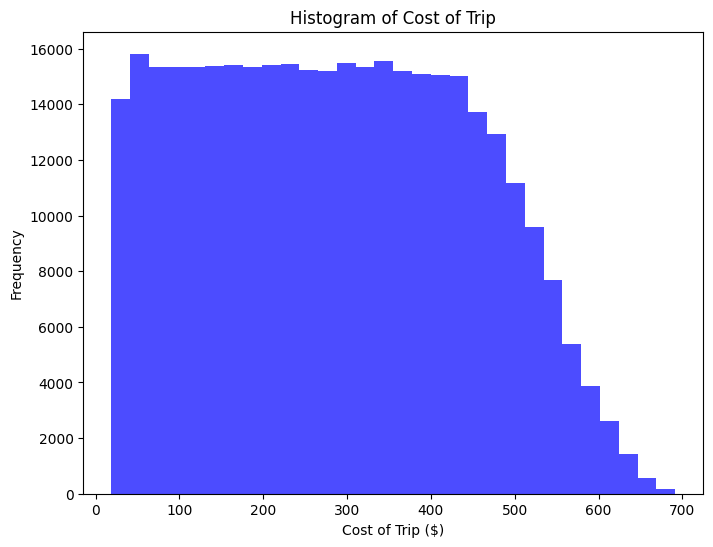

In [27]:
# Create a histogram for 'Cost of Trip' to check the distribution
plt.figure(figsize=(8, 6))
plt.hist(df_cab['Cost of Trip'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Cost of Trip')
plt.xlabel('Cost of Trip ($)')
plt.ylabel('Frequency')
plt.show()

Insight: The number of trips remains fairly steady even as the cost of trip rises up ubtill around $450. Further increase in cost sees a sharp fall in the number of trips.

'KM Travelled' Feature

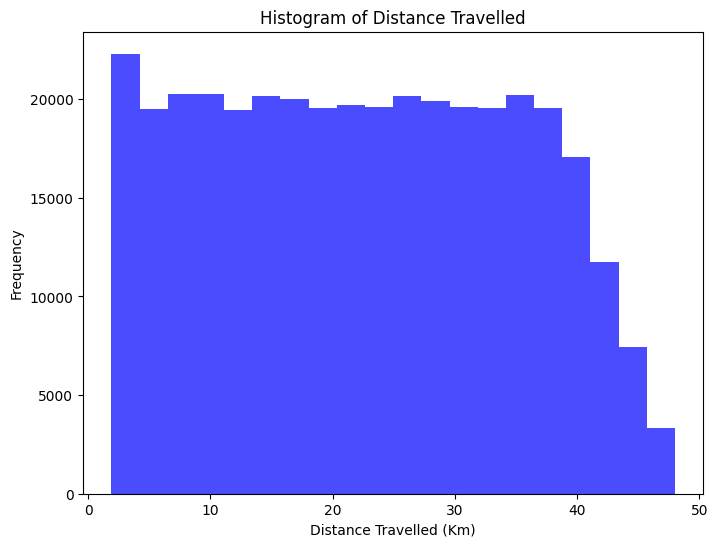

In [28]:
# Create a histogram for 'KM Travelled' to check the distribution
plt.figure(figsize=(8, 6))
plt.hist(df_cab['KM Travelled'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Distance Travelled')
plt.xlabel('Distance Travelled (Km)')
plt.ylabel('Frequency')
plt.show()

Insight: This has a very similar shape to the 'Cost of Trip' feature. The number of trips remained fairly constant even as the distance travelled increased up untill about 40Km. Further increase in distance sees a steep fall in number of trips.

'Date of Travel' Feature

In [29]:
df_cab['Date of Travel'].describe()

count    359392.000000
mean      42964.067998
std         307.467197
min       42371.000000
25%       42697.000000
50%       42988.000000
75%       43232.000000
max       43465.000000
Name: Date of Travel, dtype: float64

<h4 style='text-align: left'>Feature Engineering using 'Date of Travel' Feature</h4>

Using the minimum value in 'Date of travel' feature - 42371 and the beginning year of our dataset - 2016, we calculate the reference year


In [30]:
ref_year = 2016 - int(42371/365)
print(f"The reference year is {ref_year}")

The reference year is 1900


In [31]:
#create a feature with 'Day of Travel' converted to datetime
# Define the reference date
reference_date = pd.to_datetime('1900-01-31')

# Convert the 'Date of Travel' column to datetime as 'Day of Travel'
df_cab['Day of Travel'] = reference_date + pd.to_timedelta(df_cab['Date of Travel'], unit='D')


In [32]:
#view the changes made
df_cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Day of Travel
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,2017-09-18 01:37:55.042293760
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,2016-02-03 00:00:00
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2016-12-25 00:00:00
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,2017-10-12 00:00:00
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,2018-06-13 00:00:00
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,2019-02-01 00:00:00
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,NaN


In [33]:
# Create a new feature for months
df_cab['Month'] = df_cab['Day of Travel'].dt.month


In [34]:
#view the changes made
df_cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,2017-09-18 01:37:55.042293760,6.927887
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,2016-02-03 00:00:00,1.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2016-12-25 00:00:00,4.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,2017-10-12 00:00:00,7.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,2018-06-13 00:00:00,10.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,2019-02-01 00:00:00,12.000000
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,NaN,3.757709


In [35]:
# Create a feature for month name
df_cab['Month Name'] = df_cab['Day of Travel'].dt.strftime('%B')



In [36]:
#view the changes
df_cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,2017-09-18 01:37:55.042293760,6.927887
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,2016-02-03 00:00:00,1.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2016-12-25 00:00:00,4.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,2017-10-12 00:00:00,7.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,2018-06-13 00:00:00,10.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,2019-02-01 00:00:00,12.000000
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,NaN,3.757709


In [37]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month,Month Name
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-02-09,2,February
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-02-07,2,February
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-02-03,2,February
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-02-08,2,February
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-02-04,2,February


In [38]:
# Create a new feature for seasons
def season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df_cab['Season'] = df_cab['Month'].apply(season)


In [39]:
# View changes made
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month,Month Name,Season
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-02-09,2,February,Winter
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-02-07,2,February,Winter
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-02-03,2,February,Winter
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-02-08,2,February,Winter
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-02-04,2,February,Winter


In [40]:
df_cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month,Month Name,Season
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-02-09,2,February,Winter
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-02-05,2,February,Winter
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-02-06,2,February,Winter
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-02-06,2,February,Winter
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,2018-02-03,2,February,Winter


<h4 style='text-align: left'>Feature Engineering using 'Cost of Trip' and 'Price Charged' Features</h4>

In [41]:
# Create a profit feature
# Calculate the profit by subtracting "Cost of Trip" from "Price Charged"
df_cab['Profit'] = df_cab['Price Charged'] - df_cab['Cost of Trip']



In [42]:
# Verify new feature

print(df_cab[['Price Charged', 'Cost of Trip', 'Profit']].head())

   Price Charged  Cost of Trip  Profit
0         370.95       313.635  57.315
1         358.52       334.854  23.666
2         125.20        97.632  27.568
3         377.40       351.602  25.798
4         114.62        97.776  16.844


In [43]:
# Calculate the profit margin and add it as a new column in the DataFrame
df_cab['Profit Margin (%)'] = (df_cab['Profit'] / df_cab['Cost of Trip']) * 100


In [44]:
# Display the first few rows to verify the new column
df_cab[['Profit Margin (%)']].head()

,Profit Margin (%)
0,18.274427
1,7.067558
2,28.236644
3,7.337273
4,17.227131


<h4 style='text-align: left'>Analysis of Engineered Features</h4>

In [45]:
# As only February and Winter is seen, confirm other months and seasons
df_cab['Month Name'].describe()

count      359392
unique         12
top       January
freq        46701
Name: Month Name, dtype: object

Insight: There are 23 unique vales meaning the 12 months are represented, with January being the most frequent.

In [46]:
df_cab['Season'].describe()

count     359392
unique         4
top       Winter
freq      113086
Name: Season, dtype: object

Insight: The 4 seasons are represented with Winter being the most frequent probably because the weather would not be condusive for walks

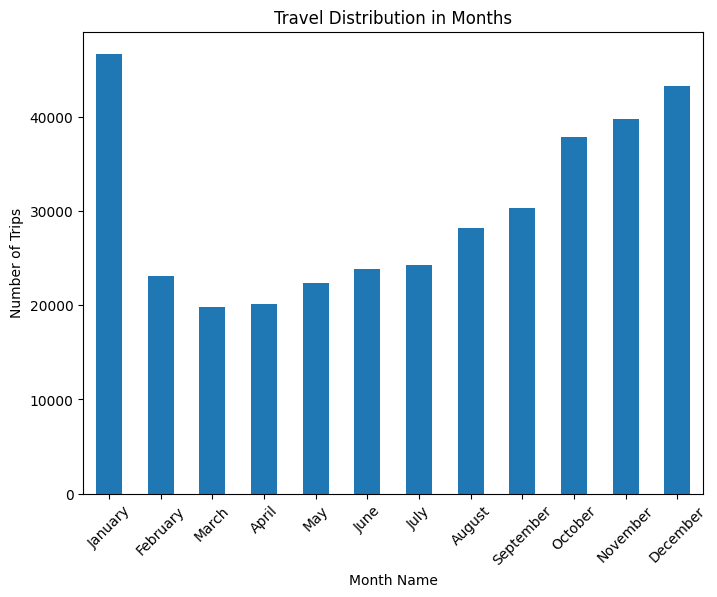

In [47]:
# Distribution of Months
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_counts = df_cab['Month Name'].value_counts().reindex(month_order)
month_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Travel Distribution in Months')
plt.xticks(rotation=45)
plt.ylabel('Number of Trips')
plt.show()


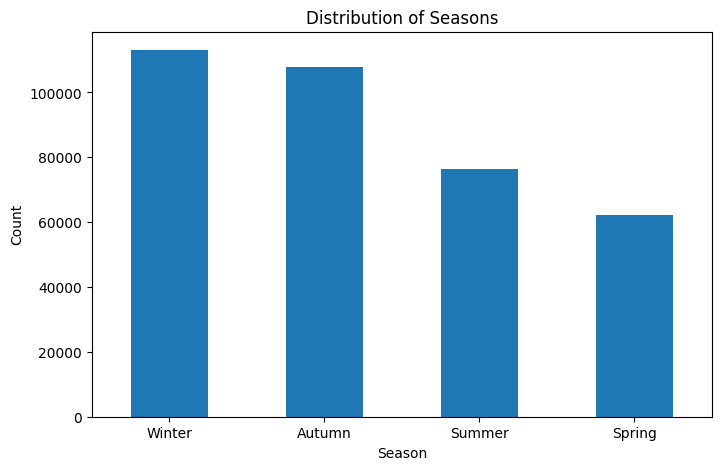

In [48]:
# Distribution of Seasons
df_cab['Season'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Insight: The most frequent seasons are Winter and Autumn corresponding to the coldest seasons of the year

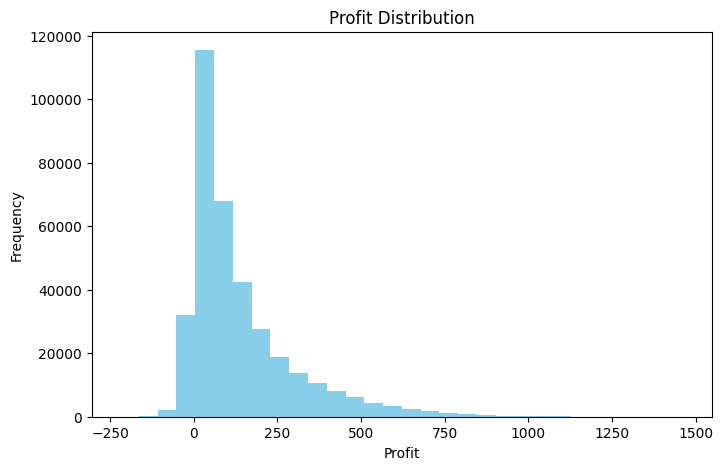

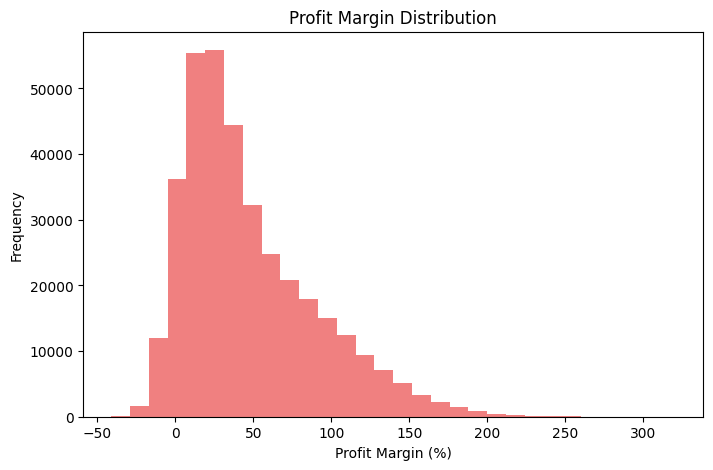

In [49]:

# Create a histogram for profit

plt.figure(figsize=(8, 5))
plt.hist(df_cab['Profit'], bins=30, color='skyblue')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for profit margin

plt.figure(figsize=(8, 5))
plt.hist(df_cab['Profit Margin (%)'], bins=30, color='lightcoral')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()


Insight: the profit and profit margin have the same shape of distribution. It is somewhat skewed to the right

<left><h4>Bivariate Analysis</h4></left>

Price Charged vs Distance Covered

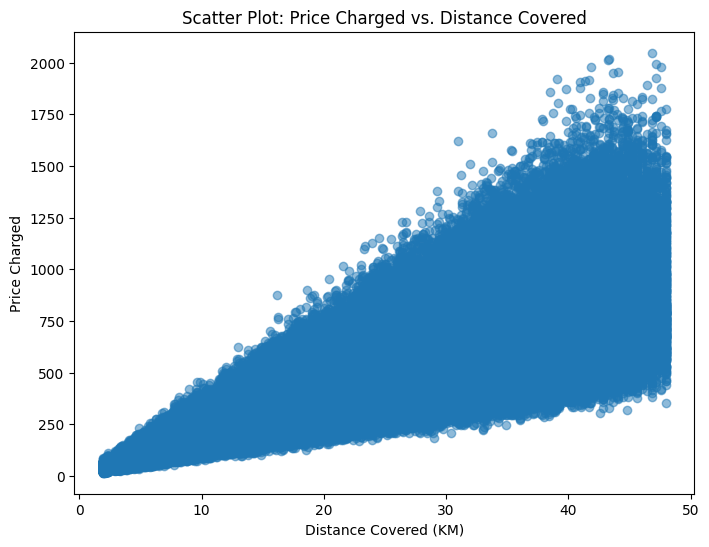

In [50]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cab['KM Travelled'], df_cab['Price Charged'], alpha=0.5)
plt.title('Scatter Plot: Price Charged vs. Distance Covered')
plt.xlabel('Distance Covered (KM)')
plt.ylabel('Price Charged')
plt.show()


There is an obvious positive correlation between the price charged and distance covered

Company vs Profit

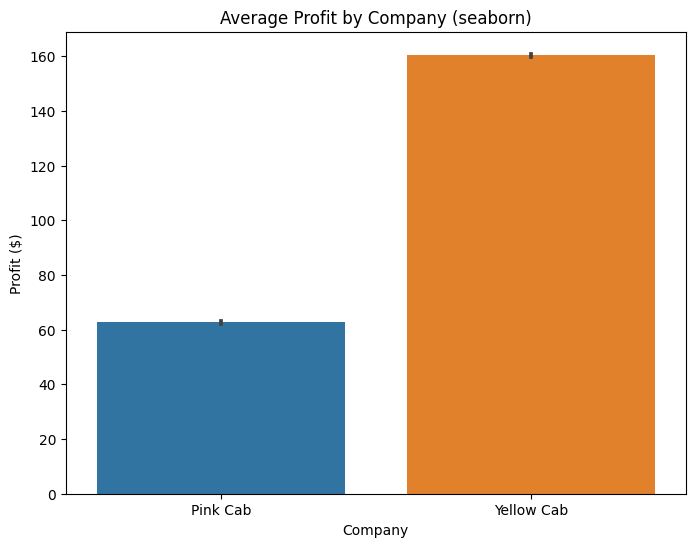

In [51]:
# Create a bar plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Profit', data=df_cab)
plt.title('Average Profit by Company (seaborn)')
plt.xlabel('Company')
plt.ylabel('Profit ($)')
plt.show()


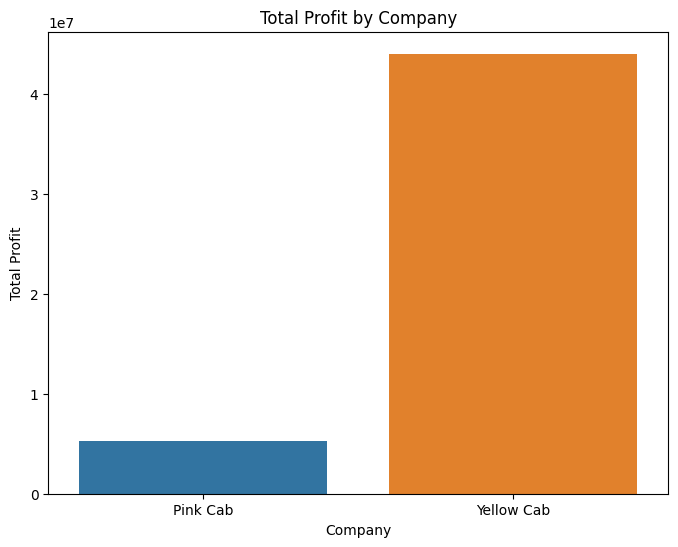

In [52]:
# Calculate the total profit for each company
total_profits = df_cab.groupby('Company')['Profit'].sum().reset_index()

# Create a bar plot of total profits
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Profit', data=total_profits)
plt.title('Total Profit by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.show()


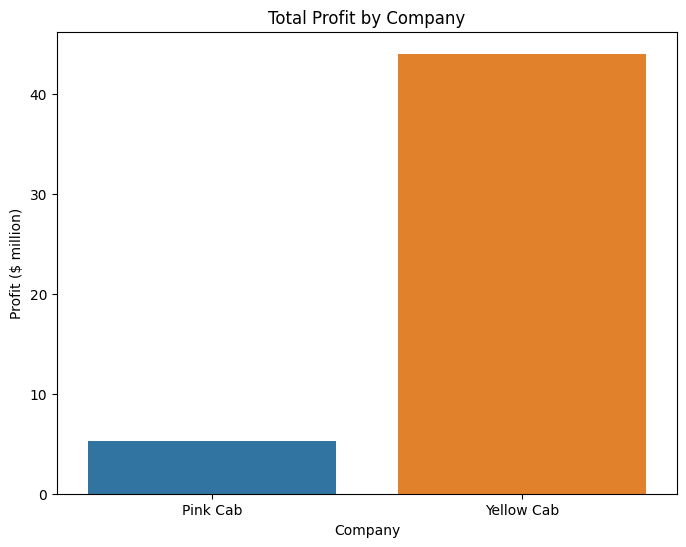

In [53]:
# Adjust the y axis to show profit in millions
# Calculate the total profit for each company
total_profits = df_cab.groupby('Company')['Profit'].sum().reset_index()

# Convert profits to millions
total_profits['Profit'] /= 1e6  # Divide by 1,000,000 to get values in millions

# Create a bar plot of total profits
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Profit', data=total_profits)
plt.title('Total Profit by Company')
plt.xlabel('Company')
plt.ylabel('Profit ($ million)')
plt.show()


```markdown
Insight: The Yellow Cab company made about $45 million compared to the Pink Cab that made just about $5 million.


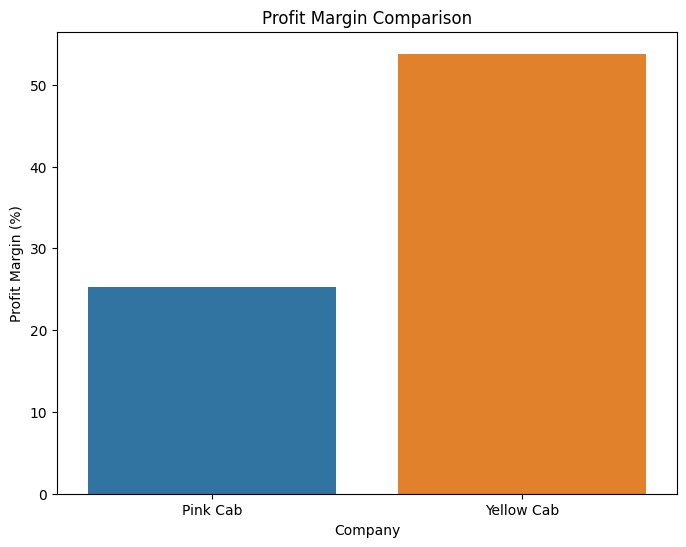

In [54]:
# Calculate the total cost, total profit, and profit margin for each company
company_totals = df_cab.groupby('Company')[['Cost of Trip', 'Profit']].sum().reset_index()

# Calculate the profit margin (%) for each company
company_totals['Profit Margin (%)'] = (company_totals['Profit'] / company_totals['Cost of Trip']) * 100

# Create a bar plot to compare profit margins of Pink Cab and Yellow Cab
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Profit Margin (%)', data=company_totals)
plt.title('Profit Margin Comparison')
plt.xlabel('Company')
plt.ylabel('Profit Margin (%)')
plt.show()


Insight: Pink Cab has a profit margin of around 25% while Yellow cab has a profit margin of above 50%. This means that Yellow cab would give over 50% returns which is wawy hihger than for Pink Cab.

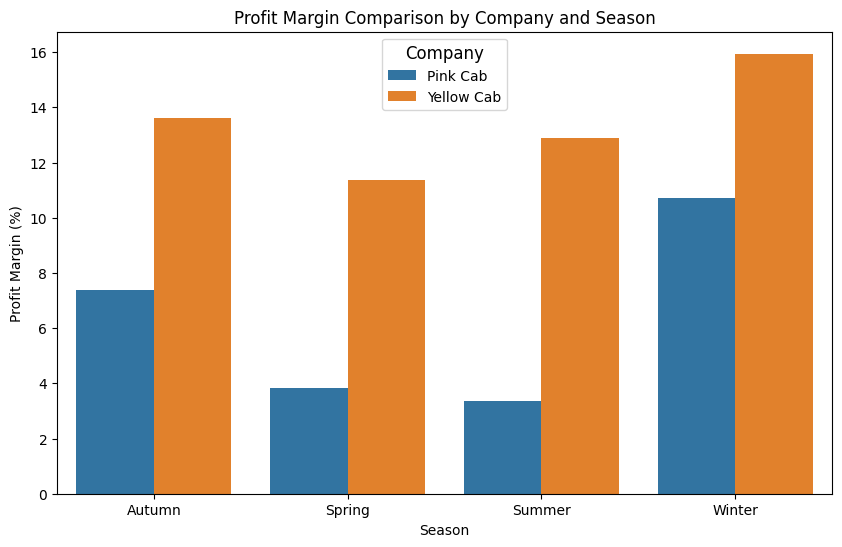

In [55]:
# Calculate the profit margin for each company and season
company_season_totals = df_cab.groupby(['Company', 'Season'])[['Profit', 'Cost of Trip']].sum().reset_index()

# Calculate the profit margin (%) for each company and season
company_season_totals['Profit Margin (%)'] = (company_season_totals['Profit'] / 
                                               company_season_totals.groupby('Company')['Cost of Trip'].transform('sum')) * 100

# Create a grouped bar plot to compare profit margins by company and season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Profit Margin (%)', hue='Company', data=company_season_totals)
plt.title('Profit Margin Comparison by Company and Season')
plt.xlabel('Season')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Company', title_fontsize='12', loc='upper center')
plt.show()


Insight: The yellow Cab consistently outperforms the Pink Cab across all seasons. The margin is widest in warmer seasons - summer and spring.

<left><h3>City_Data Analysis</h3></left>

In [56]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [57]:
df_city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


Insight: Yew York NY is the city with the highest population  and highest number of cab users

<left><h3>Customer_Data Analysis</h3></left>

In [58]:
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [59]:
#Check for missing values
df_customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [60]:
#Confirm uniqueness of customer id
is_unique = not df_customer['Customer ID'].duplicated().any()

if is_unique:
    print(f"The entries in 'Customer ID' are unique.")
else:
    print(f"The entries in 'Customer ID' are not unique.")


The entries in 'Customer ID' are unique.


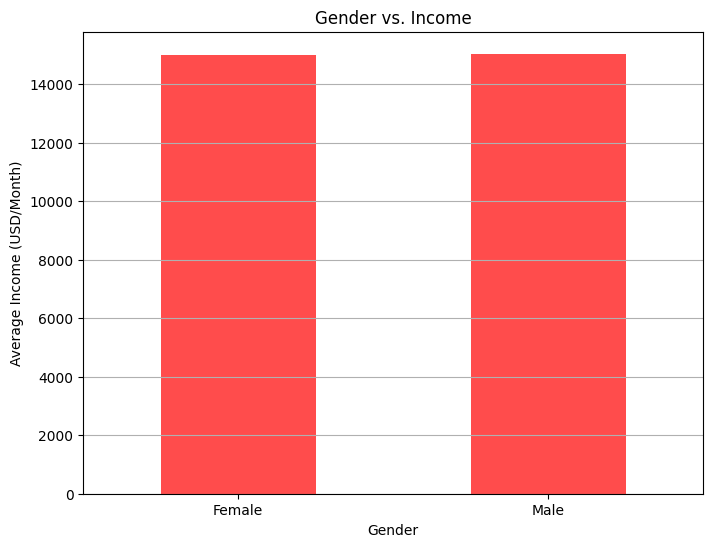

In [61]:

# Group the data by Gender and calculate the mean income for each group
gender_income = df_customer.groupby('Gender')['Income (USD/Month)'].mean()

# Create a bar plot for Gender vs. Income
plt.figure(figsize=(8, 6))
gender_income.plot(kind='bar', color='red', alpha=0.7)
plt.title('Gender vs. Income')
plt.xlabel('Gender')
plt.ylabel('Average Income (USD/Month)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



Insight: Both genders have similar 

<left><h3>Transaction_Data Analysis</h3></left>

In [62]:
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [63]:
df_transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [64]:

unique_df_transaction = df_transaction['Transaction ID'].nunique()
print(f"Number of unique entries in 'Transaction ID': {unique_df_transaction}")


Number of unique entries in 'Transaction ID': 440098


Insight: The number of unique transaction IDs is more here than in the df_cab dataset. This will impact joining the datasets

In [65]:
unique_df_cust_id = df_transaction['Customer ID'].nunique()
print(f"Number of unique entries in 'Customer ID': {unique_df_cust_id}")

Number of unique entries in 'Customer ID': 49171


Insight: This is less than the number of unique transaction IDs which suggests some repeat customers

In [66]:
#Check for missing values
df_transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

<left><h2>Creating a Master Dataset</h2></left>

In [67]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day of Travel,Month,Month Name,Season,Profit,Profit Margin (%)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-02-09,2,February,Winter,57.315,18.274427
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-02-07,2,February,Winter,23.666,7.067558
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-02-03,2,February,Winter,27.568,28.236644
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-02-08,2,February,Winter,25.798,7.337273
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-02-04,2,February,Winter,16.844,17.227131


In [68]:
# drop features - date of travel, price charged and cost of trip

columns_to_drop = ['Date of Travel', 'Cost of Trip', 'Price Charged']

# Drop the specified columns from the DataFrame

df_cab.drop(columns=columns_to_drop, inplace=True)



In [69]:
# Verify the columns have been dropped
df_cab.head()

,Transaction ID,Company,City,KM Travelled,Day of Travel,Month,Month Name,Season,Profit,Profit Margin (%)
0,10000011,Pink Cab,ATLANTA GA,30.45,2016-02-09,2,February,Winter,57.315,18.274427
1,10000012,Pink Cab,ATLANTA GA,28.62,2016-02-07,2,February,Winter,23.666,7.067558
2,10000013,Pink Cab,ATLANTA GA,9.04,2016-02-03,2,February,Winter,27.568,28.236644
3,10000014,Pink Cab,ATLANTA GA,33.17,2016-02-08,2,February,Winter,25.798,7.337273
4,10000015,Pink Cab,ATLANTA GA,8.73,2016-02-04,2,February,Winter,16.844,17.227131


In [70]:
# Merge the df_cab, df_city, df_customer and df_transaction datyasets
# Merge the cab dataset with the transaction dataset using a left join
master_dataset = df_cab.merge(df_transaction, on='Transaction ID', how='left')

# Merge the master dataset with the city dataset using a left join
master_dataset = master_dataset.merge(df_city, on='City', how='left')

# Merge the master dataset with the customer dataset using a left join
master_dataset = master_dataset.merge(df_customer, on='Customer ID', how='left')




In [71]:
master_dataset.head()

,Transaction ID,Company,City,KM Travelled,Day of Travel,Month,Month Name,Season,Profit,Profit Margin (%),Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,2016-02-09,2,February,Winter,57.315,18.274427,29290,Card,"814,885","24,701",Male,28,10813
1,10000012,Pink Cab,ATLANTA GA,28.62,2016-02-07,2,February,Winter,23.666,7.067558,27703,Card,"814,885","24,701",Male,27,9237
2,10000013,Pink Cab,ATLANTA GA,9.04,2016-02-03,2,February,Winter,27.568,28.236644,28712,Cash,"814,885","24,701",Male,53,11242
3,10000014,Pink Cab,ATLANTA GA,33.17,2016-02-08,2,February,Winter,25.798,7.337273,28020,Cash,"814,885","24,701",Male,23,23327
4,10000015,Pink Cab,ATLANTA GA,8.73,2016-02-04,2,February,Winter,16.844,17.227131,27182,Card,"814,885","24,701",Male,33,8536


In [72]:
# Check for null values in the entire dataset
null_values = master_dataset.isnull().sum()

# Print the count of null values for each column
print(null_values)


Transaction ID        0
Company               0
City                  0
KM Travelled          0
Day of Travel         0
Month                 0
Month Name            0
Season                0
Profit                0
Profit Margin (%)     0
Customer ID           0
Payment_Mode          0
Population            0
Users                 0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [73]:
# Check for duplicates
duplicate_rows = master_dataset[master_dataset.duplicated()]

# Print them 
if not duplicate_rows.empty:
    print("Duplicate entries found:")
    print(duplicate_rows)
else:
    print("No duplicate entries found")


No duplicate entries found


There are no null entries and no duplicates

<left><h2>Recommendations</h2></left>

Based on the results of my analysis, I found out that Yellow Cab accounts for 76% of cab trips, makes more profit and has a much higher profit margin than Pink Cab. Therefore, I recommend investing in Yellow Cab as the data indicates that it would give a much higher return on investment